/home/carlson/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:58: RuntimeWarning: divide by zero encountered in divide


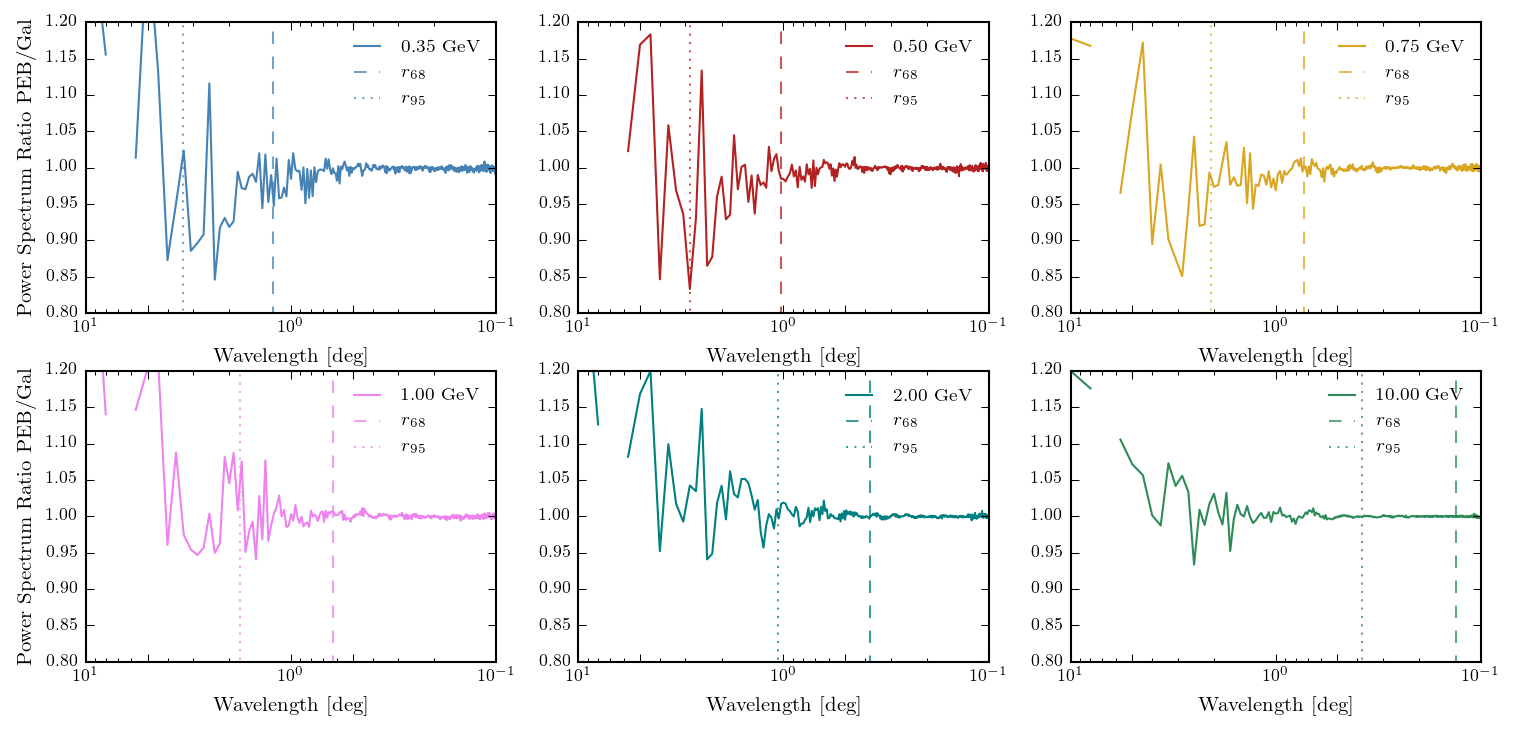

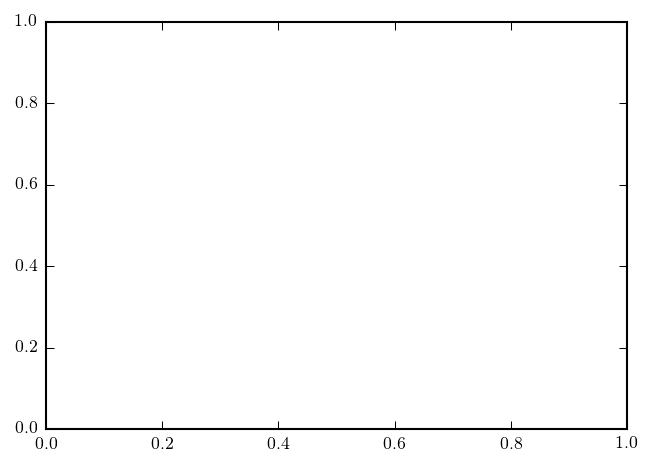

In [5]:
from scipy import fftpack
import pyfits
import numpy as np
import pylab as py
import radialprofile
 
import h5py
import healpy

import sys
sys.path.append('../')
import Tools    

    
def PowerSpectrum(model, E, label):
    h5 = h5py.File('../mod_c/mod_o_%i_XCO_stripped.hdf5'%model)
    residual = h5['/fit_results/GC/residual'][...]
    
    energies = h5['/fit_results/GC'].attrs['energies']
    E_bin = np.argmin(np.abs(E-energies/1e3))
    
    plt.figure(1)
    res = healpy.cartview(residual[E_bin], return_projected_map=True, latra=[-20,20], lonra=[-20,20], xsize=320, hold=True)
    py.clf()
    
    
    # Take the fourier transform of the image.
    F1 = fftpack.fft2(res)

    # Now shift the quadrants around so that low spatial frequencies are in
    # the center of the 2D fourier transformed image.
    F2 = fftpack.fftshift( F1 )

    # Calculate a 2D power spectrum
    psd2D = np.abs( F2 )**2

    # Calculate the azimuthally averaged 1D power spectrum
    psd1D = radialprofile.azimuthalAverage(psd2D)
    psd1D_sigma = radialprofile.azimuthalAverage(psd2D,stddev=True)

    # # Now plot up both
    # py.figure(1)
    # py.clf()
    # py.imshow( np.log10( res ), cmap=py.cm.Greys)

    # py.figure(2)
    # py.clf()
    # py.imshow( np.log10( psd2D ))

#     py.figure(3)
    
    
#     py.semilogy(40./np.arange(len(psd1D)), psd1D , label='%1.2f GeV'%(energies[E_bin]/1e3) + ' ' + label)
#     py.xlabel(r'Wavenumber [$\rm deg^{-1}$]')
#     py.ylabel('Power Spectrum')
#     plt.xscale('log')
#     plt.xlim(5,.125)
    return 40./np.arange(len(psd1D)), psd1D, psd1D_sigma




colors=['steelblue', 'firebrick', 'goldenrod', 'violet', 'teal','seagreen']

for i_E, E in enumerate([.35, .5, .75, 1, 2, 10]):
    wave, pwr1, pwr1_sig = PowerSpectrum(14 , E=E, label='PEB 14')
    wave, pwr2, pwr2_sig = PowerSpectrum(42 , E=E, label='Gal 42')
    plt.legend(frameon=False)
    #plt.show()
    #plt.text(.85,.9, '%1.2f GeV'%E, transform=plt.gca().transAxes)

    plt.figure(0, figsize=(12,5.5))
    plt.subplot(2,3,i_E+1)
    h5 = h5py.File('../mod_c/mod_o_17_XCO_stripped.hdf5')
    energies = h5['/fit_results/GC'].attrs['energies']
    bins = h5['/fit_results/GC'].attrs['bins']
    E_bin = np.argmin(np.abs(E-energies/1e3))


    thetas, psf = Tools.GetPSF(bins[E_bin],bins[E_bin+1], psfFile='../gtpsf_P7REP_CLEAN_V15_calore.fits')
    
    containment_fraction=0.68 
    con_radius_68 = thetas[np.argmin(np.abs(containment_fraction - np.cumsum(thetas*psf)/np.sum(thetas*psf)))]
    
    containment_fraction=0.95 
    con_radius_95 = thetas[np.argmin(np.abs(containment_fraction - np.cumsum(thetas*psf)/np.sum(thetas*psf)))]

    plt.plot(wave , pwr1/pwr2, label='%1.2f GeV'%E, color=colors[i_E])
    plt.vlines(con_radius_68,0,2, linestyles='--',alpha=.75, color=colors[i_E], label='$r_{68}$')
    plt.vlines(con_radius_95,0,2, linestyles=':', alpha=.75, color=colors[i_E], label='$r_{95}$')
    plt.xscale('log')
    plt.xlim(5,.125)
    plt.xticks([.1,.5, 1, 5,10])
    plt.ylim(.8,1.2)
    plt.legend(frameon=False, loc=1)
    
    plt.xlabel(r'Wavelength [$\rm deg$]')
    if i_E in [0,3]:
        plt.ylabel('Power Spectrum Ratio PEB/Gal')
    
    #plt.show()





/home/carlson/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:14: RuntimeWarning: divide by zero encountered in divide


(0.001, 1)

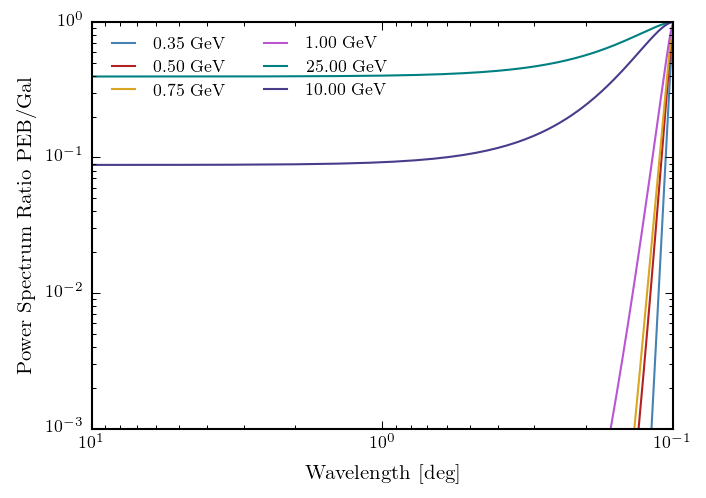

In [177]:




for E in [.35e3,.5e3, .75e3,1e3,25e3,10e3]:
    thetas, psf = Tools.GetPSF(E,E, psfFile='../gtpsf_P7REP_CLEAN_V15_calore.fits')
    psf_interp  = lambda theta: np.interp(np.abs(theta), np.abs(thetas),psf)
    #psf_interp  = lambda theta: np.interp(np.abs(theta), np.abs(thetas),np.exp(-thetas**2/2))

    theta_linear = np.linspace(-10,10,201)
    FFT = np.fft.fftn(psf_interp(theta_linear))
    PS = abs(FFT)**2 
    
    plt.loglog(1/theta_linear, PS/PS.max(), label='%1.2f GeV'%(E/1e3))
    
    plt.xlim(10,1e-1)
plt.legend(frameon=False, loc=2, ncol=2, fontsize=8)

plt.xlabel(r'Wavelength [$\rm deg$]')
plt.ylabel('Power Spectrum Ratio PEB/Gal')
plt.ylim(1e-3, 1)


/home/carlson/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:58: RuntimeWarning: divide by zero encountered in divide


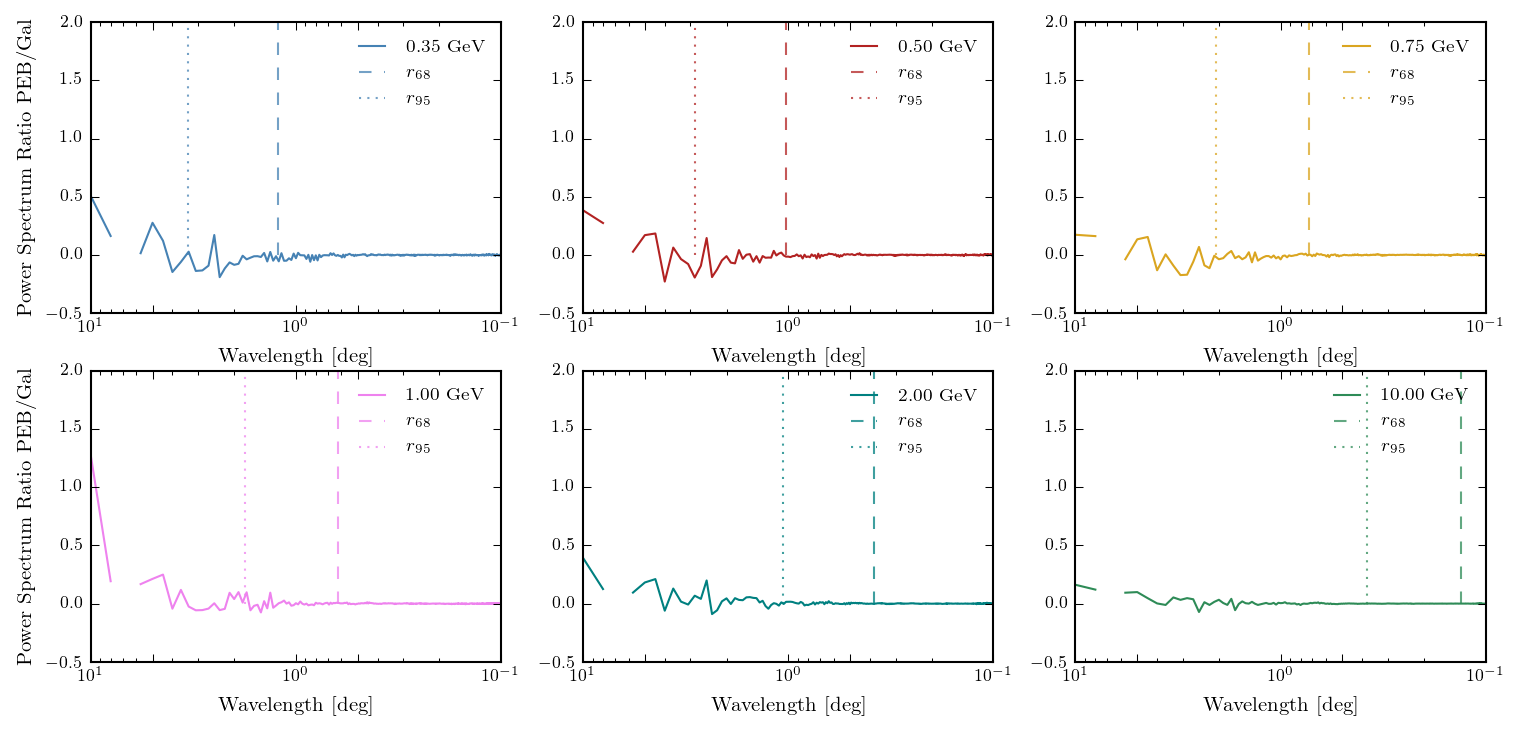

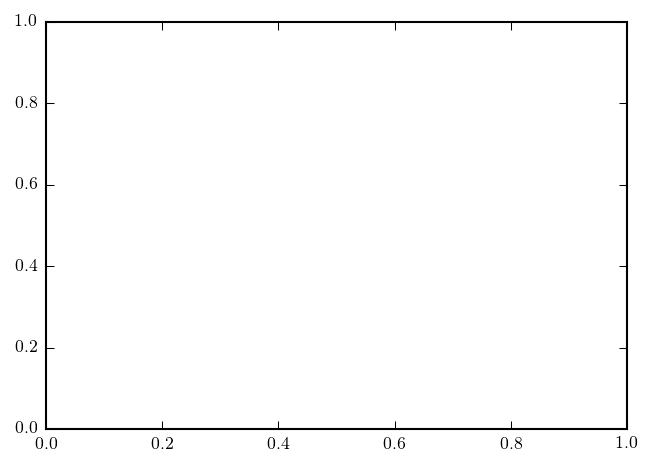

In [6]:
for i_E, E in enumerate([.35, .5, .75, 1, 2, 10]):
    wave, pwr1, pwr1_sig = PowerSpectrum(14 , E=E, label='PEB 14')
    wave, pwr2, pwr2_sig = PowerSpectrum(42 , E=E, label='Gal 42')
    plt.legend(frameon=False)
    #plt.show()
    #plt.text(.85,.9, '%1.2f GeV'%E, transform=plt.gca().transAxes)

    plt.figure(0, figsize=(12,5.5))
    plt.subplot(2,3,i_E+1)
    h5 = h5py.File('../mod_c/mod_o_17_XCO_stripped.hdf5')
    energies = h5['/fit_results/GC'].attrs['energies']
    bins = h5['/fit_results/GC'].attrs['bins']
    E_bin = np.argmin(np.abs(E-energies/1e3))


    thetas, psf = Tools.GetPSF(bins[E_bin],bins[E_bin+1], psfFile='../gtpsf_P7REP_CLEAN_V15_calore.fits')
    
    containment_fraction=0.68 
    con_radius_68 = thetas[np.argmin(np.abs(containment_fraction - np.cumsum(thetas*psf)/np.sum(thetas*psf)))]
    
    containment_fraction=0.95 
    con_radius_95 = thetas[np.argmin(np.abs(containment_fraction - np.cumsum(thetas*psf)/np.sum(thetas*psf)))]

    plt.plot(wave , (pwr1-pwr2)/pwr1_sig, label='%1.2f GeV'%E, color=colors[i_E])
    plt.vlines(con_radius_68,0,2, linestyles='--',alpha=.75, color=colors[i_E], label='$r_{68}$')
    plt.vlines(con_radius_95,0,2, linestyles=':', alpha=.75, color=colors[i_E], label='$r_{95}$')
    plt.xscale('log')
    plt.xlim(5,.125)
    plt.xticks([.1,.5, 1, 5,10])
    #plt.ylim(.8,1.2)
    plt.legend(frameon=False, loc=1)
    
    plt.xlabel(r'Wavelength [$\rm deg$]')
    if i_E in [0,3]:
        plt.ylabel('Power Spectrum Ratio PEB/Gal')
    
    #plt.show()